<div style="border:solid black 1px; padding: 20px">
    
<font size="4"><p style="text-align:center"><b>The choice of locations for wells 🛢️</b></p></font>

</div>

# content
1. [Data description](#data_description)
2. [EDA](#EDA)
3. [Model Training](#Model_Training) 
4. [Preparation for profit calculation](#Preparation_for_profit_calculation) 
5. [Function for calculating profit for selected wells](#Function_for_calculating_profit_for_selected_wells) 
6. [Risks and rewards for each region](#Risks_and_rewards_for_each_region) 
7. [Conclusion](#Conclusion)

<div class="alert alert-info">
<font size="4", color = "black"><a name="data_description"><h3>Data description</h3></a></font>
    <br /> 
    <font size="3", color = "black">

<div>
<font size="4", color = "black">The mining company GlavRosGosNeft needs to decide where to drill a new well.
    
Oil samples were provided in three regions. The characteristics for each well in the region are already known. We will build a model to determine the region where mining will bring the greatest profit. 

<ul>
 <li>id — unique well identifier</li>
 <li>f0, f1, f2 — 
three signs of dots (it doesn't matter what they mean, but the signs themselves are significant)</li>
 <li>product — 
volume of reserves in the well (thousand barrels)</li>
</ul>

<div class="alert alert-info">
<font size="4", color = "black"><a name="EDA"><h3>EDA</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [1]:
conda install -c conda-forge phik

Retrieving notices: ...working... done
Solving environment: done

## Package Plan ##

  environment location: /Users/moonkerimka/opt/anaconda3

  added / updated specs:
    - phik


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.1.0               |   py39h6e9494a_0         908 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         908 KB

The following packages will be UPDATED:

  conda                              22.11.1-py39h6e9494a_1 --> 23.1.0-py39h6e9494a_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import phik
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from phik import report
from scipy import stats as st 
from phik.report import plot_correlation_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<div>
<font size="4", color = "black">During the exploration of the region, 500 points are explored, from which, using machine learning, the best 200 are selected for development.
The budget for the development of wells in the region is 10 billion rubles.
At current prices, one barrel of raw materials brings 450 rubles of income. The income from each unit of the product is 450 thousand rubles, since the volume is indicated in thousands of barrels.

In [3]:
BUDGET = 1e10
PRICE = 450000
POINT_ML = 200
POINT_EDA = 500

In [4]:
pth1 = '/datasets/geo_data_0.csv'
pth2 = 'geo_data_0.csv'
if os.path.exists(pth1):
    data_one = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_one = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [5]:
pth3 = '/datasets/geo_data_1.csv'
pth4 = 'geo_data_1.csv'
if os.path.exists(pth3):
    data_two = pd.read_csv(pth3)
elif os.path.exists(pth4):
    data_two = pd.read_csv(pth4)
else:
    print('Something is wrong')

In [6]:
pth5 = '/datasets/geo_data_2.csv'
pth6 = 'geo_data_2.csv'
if os.path.exists(pth5):
    data_three = pd.read_csv(pth5)
elif os.path.exists(pth6):
    data_three = pd.read_csv(pth6)
else:
    print('Something is wrong')

In [7]:
data_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_three.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
data_one.duplicated().sum()

0

In [11]:
data_two.duplicated().sum()

0

In [12]:
data_three.duplicated().sum()

0

In [13]:
def drop_col(data, field):
    '''
the function deletes a column in the dataset
    '''
    return data.drop([field], axis = 1)

In [14]:
data_one = drop_col(data_one, 'id')
data_two = drop_col(data_two, 'id')
data_three = drop_col(data_three, 'id')


In [15]:
data_train_one, data_valid_one = train_test_split(data_one, test_size=0.25, random_state=42, shuffle = True)
features_train_one = data_train_one.drop(['product'], axis=1)
target_train_one = data_train_one['product']
features_valid_one = data_valid_one.drop(['product'], axis=1)
target_valid_one = data_valid_one['product']
print(features_train_one.shape)
print(features_valid_one.shape)

(75000, 3)
(25000, 3)


In [16]:
data_train_two, data_valid_two = train_test_split(data_two, test_size=0.25, random_state=42, shuffle = True)
features_train_two = data_train_two.drop(['product'], axis=1)
target_train_two = data_train_two['product']
features_valid_two = data_valid_two.drop(['product'], axis=1)
target_valid_two = data_valid_two['product']
print(features_train_two.shape)
print(features_valid_two.shape)

(75000, 3)
(25000, 3)


In [17]:
data_train_three, data_valid_three = train_test_split(data_three, test_size=0.25, random_state=42, shuffle = True)
features_train_three = data_train_three.drop(['product'], axis=1)
target_train_three = data_train_three['product']
features_valid_three = data_valid_three.drop(['product'], axis=1)
target_valid_three = data_valid_three['product']
print(features_train_three.shape)
print(features_valid_three.shape)

(75000, 3)
(25000, 3)


In [18]:
def scaler(data_train, data_valid):
    '''
Function, brings all features to scaling
    '''
    numeric = data_train.columns
    scaler = StandardScaler()
    scaler.fit(data_train[numeric])
    data_train[numeric] = scaler.transform(data_train[numeric])
    data_valid[numeric] = scaler.transform(data_valid[numeric])
    return data_train, data_valid

In [19]:
features_train_one, features_valid_one = scaler(features_train_one, features_valid_one)
features_train_two, features_valid_two = scaler(features_train_two, features_valid_two)
features_train_three, features_valid_three = scaler(features_train_three, features_valid_three)

In [20]:
features_train_one.describe()

,f0,f1,f2
count,7.500000e+04,7.500000e+04,7.500000e+04
mean,-1.151109e-16,4.812743e-17,2.568390e-17
std,1.000007e+00,1.000007e+00,1.000007e+00
min,-2.188139e+00,-2.182397e+00,-3.892907e+00
25%,-6.589992e-01,-8.917428e-01,-6.836300e-01
50%,3.205561e-03,2.611348e-03,4.889632e-03
75%,6.547445e-01,8.901383e-01,6.809043e-01
max,2.135099e+00,2.145152e+00,4.152764e+00


In [21]:
features_train_two.describe()

,f0,f1,f2
count,7.500000e+04,7.500000e+04,7.500000e+04
mean,-2.491340e-17,5.180782e-17,1.442491e-16
std,1.000007e+00,1.000007e+00,1.000007e+00
min,-3.652284e+00,-4.211144e+00,-1.475801e+00
25%,-8.296259e-01,-6.770941e-01,-8.780706e-01
50%,4.018308e-03,-3.411787e-03,-2.839520e-01
75%,8.338530e-01,6.796487e-01,8.829801e-01
max,3.156437e+00,4.209555e+00,1.481644e+00


In [22]:
features_train_three.describe()

,f0,f1,f2
count,7.500000e+04,7.500000e+04,7.500000e+04
mean,2.661575e-18,-2.466471e-17,-2.847796e-17
std,1.000007e+00,1.000007e+00,1.000007e+00
min,-5.062022e+00,-4.087359e+00,-4.163654e+00
25%,-6.722684e-01,-6.782630e-01,-6.790620e-01
50%,4.116749e-03,-4.496735e-03,-1.457466e-03
75%,6.671673e-01,6.742285e-01,6.800652e-01
max,4.180251e+00,4.532761e+00,4.095557e+00


In [23]:
features_valid_one.describe()

,f0,f1,f2
count,25000.000000,25000.000000,25000.000000
mean,0.001946,-0.005980,-0.009740
std,0.998089,1.006369,0.998770
min,-2.015492,-2.175823,-4.493047
25%,-0.650799,-0.915047,-0.685719
50%,0.000411,-0.013012,-0.007607
75%,0.666343,0.900522,0.672512
max,2.042207,2.170004,3.848217


In [24]:
features_valid_two.describe()

,f0,f1,f2
count,25000.000000,25000.000000,25000.000000
mean,0.005756,0.007861,-0.002983
std,1.000983,1.001564,1.000277
min,-2.891676,-4.021811,-1.475122
25%,-0.824942,-0.672973,-0.878141
50%,-0.000730,0.003368,-0.285100
75%,0.842284,0.677099,0.882936
max,3.042560,4.599733,1.479434


In [25]:
features_valid_three.describe()

,f0,f1,f2
count,25000.000000,25000.000000,25000.000000
mean,-0.000635,0.007425,-0.008932
std,1.002439,0.996648,0.996926
min,-3.534406,-3.873919,-3.945092
25%,-0.675291,-0.666497,-0.689793
50%,0.004097,0.001848,-0.016347
75%,0.671700,0.677995,0.670447
max,4.167116,4.484868,3.781781


<div>
    <font size="3", color = "black">
<br />
No duplicates or gaps were found in the data. The data is divided into training and validation sets, features and target features. Strongly prominent anomalies in the features of the training and validation samples are not observed.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Model_Training"><h3>Model Training</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [26]:
def linear_reg(feature_train, target_train, feature_valid, target_valid):
    '''the function trains a linear regression model,
       casts predictions to Series and sets indexes similar to target'''
    model = LinearRegression()
    model.fit(feature_train, target_train)
    prediction = model.predict(feature_valid)
    np_array = np.array(prediction)
    predictions = pd.Series(np_array, target_valid.index)
    return predictions

In [27]:
def f(feature_train, target_train, feature_valid, target_valid):
    '''
function finds statistical parameters
    '''
    prediction = linear_reg(feature_train, target_train, feature_valid, target_valid)
    MSE = mean_squared_error(target_valid, prediction)
    RMSE = mean_squared_error(target_valid,prediction) ** 0.5
    R2 = r2_score(target_valid, prediction)
    print('MSE:', MSE )
    print('RMSE:', RMSE)
    print('R2:', R2)
    print('Average real stock of raw materials:', target_valid.mean())
    print('Average forecast stock of raw materials:', prediction.mean())

In [28]:
print('First region')
f(features_train_one, target_train_one, features_valid_one, target_valid_one)
print('')
print('Second region')
f(features_train_two, target_train_two, features_valid_two, target_valid_two)
print('')
print('Third region')
f(features_train_three, target_train_three, features_valid_three, target_valid_three)

First region
MSE: 1425.5608700093812
RMSE: 37.75660035026169
R2: 0.2728287328173471
Average real stock of raw materials: 92.32595637084344
Average forecast stock of raw materials: 92.3987999065781

Second region
MSE: 0.7925986566392043
RMSE: 0.8902801001028857
R2: 0.9996245232002449
Average real stock of raw materials: 68.72538074724207
Average forecast stock of raw materials: 68.71287803913759

Third region
MSE: 1611.6910636385905
RMSE: 40.14587231134218
R2: 0.19634705977280464
Average real stock of raw materials: 95.15099907172
Average forecast stock of raw materials: 94.77102387765994


In [29]:
def make_pretty(styler):
    styler.set_caption("Correlation matrix")
    styler.background_gradient(axis=None, vmin=0, vmax=1, cmap="YlGnBu")
    return styler

In [30]:
corr = data_one.corr()
corr.style.pipe(make_pretty)

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


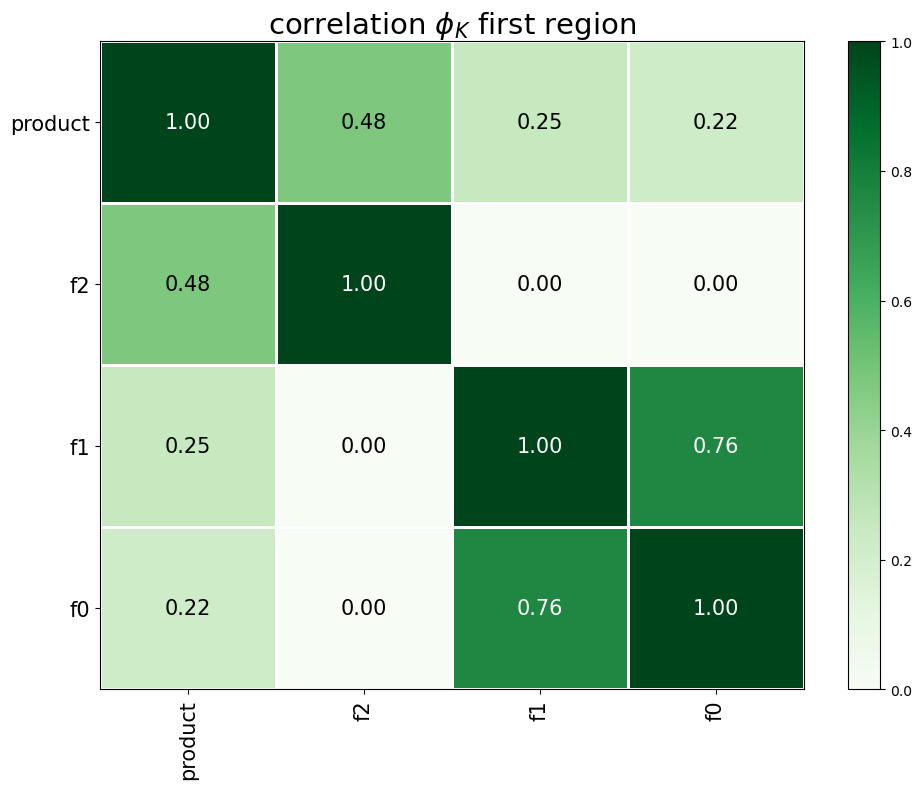

In [31]:
phik_overview = data_one.phik_matrix();
phik_overview.round(2);
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ first region", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout();

In [32]:
corr = data_two.corr()
corr.style.pipe(make_pretty)

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


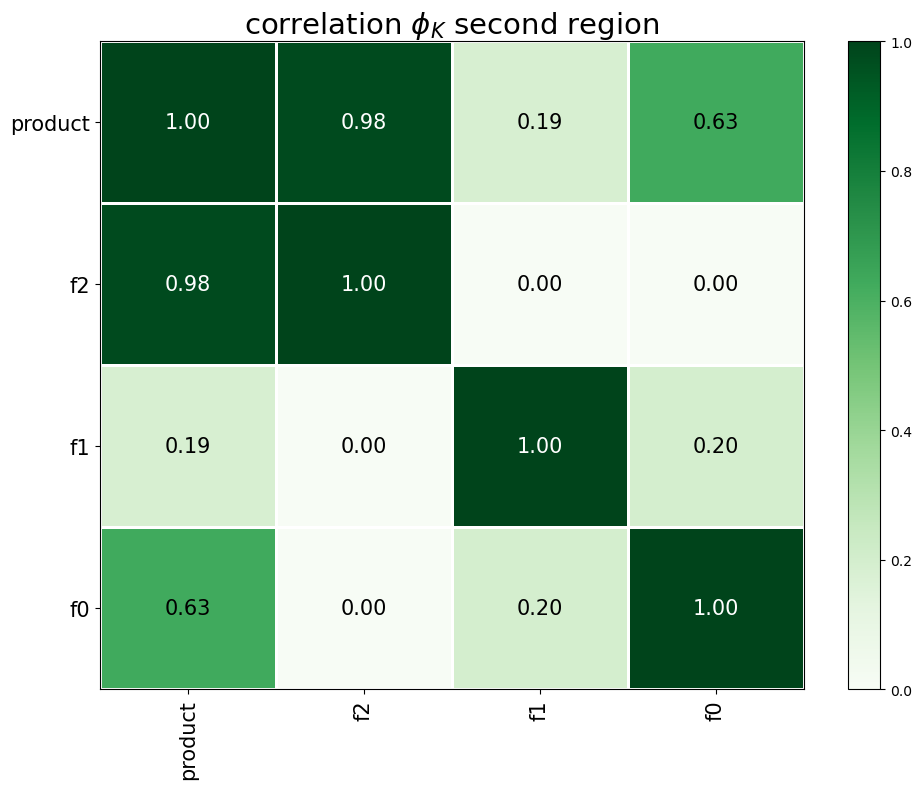

In [33]:
phik_overview = data_two.phik_matrix();
phik_overview.round(2);
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ second region", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout();

In [34]:
corr = data_three.corr()
corr.style.pipe(make_pretty)

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


interval columns not set, guessing: ['f0', 'f1', 'f2', 'product']


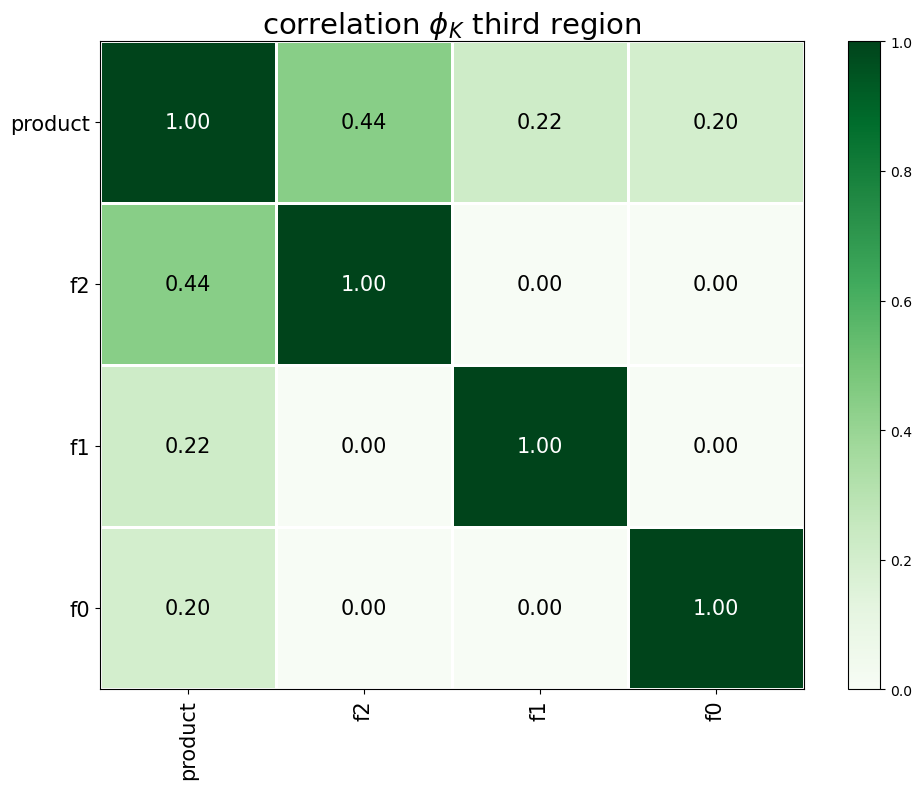

In [35]:
phik_overview = data_three.phik_matrix()
phik_overview.round(2)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ third region", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout();

<div>
   
Trained a linear regression model. In the study of data from the second region, the R2 indicator is almost 1, because has a high correlation of one of the features with the target, in contrast to the first and third regions. The MSE and RMSE metrics of the second region are low, indicating that the model fits the dataset. Pearson and Phik correlations were calculated. The nature of the relationship between the Pearson correlation data differs from the Phik correlation, except for the relationship between product and f2. Phik found a stronger relationship than the Pearson correlation.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Preparation_for_profit_calculation"><h3>Preparation for profit calculation</h3></a></font>
    <br /> 
    <font size="3", color = "black">

<div >
We calculate the volume of raw materials for the break-even development of a new well using the following formula:
    $$V = \frac{BUDGET}{PRICE\cdot POINT_ML}$$

In [36]:
print('The volume of raw materials for break-even development of a new well:', round((BUDGET / PRICE / POINT_ML), 2))

The volume of raw materials for break-even development of a new well: 111.11


In [37]:
print('Average volume of well reserves in the 1st region:', round(data_one['product'].mean(), 2))
print('Average volume of well reserves in the 2st region: ', round(data_two['product'].mean(), 2))
print('Average volume of well reserves in the 3st region:', round(data_three['product'].mean(), 2))

Average volume of well reserves in the 1st region: 92.5
Average volume of well reserves in the 2st region:  68.83
Average volume of well reserves in the 3st region: 95.0



The volume of raw materials for the break-even development of a new well is 111.11. The first and third regions are the leaders in terms of the average volume of well reserves among the studied regions. The average volume of well reserves in the first and third regions differs from the volume of raw materials for the break-even development of a new well by 1.2 and 1.16 times. The difference of the 2nd region is very different, because the volume of raw materials for the break-even development of a new well is 1.6 times greater than it, on the other hand, the model predicts well reserves very well in this region.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Function_for_calculating_profit_for_selected_wells"><h3>Function for calculating profit for selected wells</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [38]:
def profit(target, predictions):
    probs_sorted = predictions.sort_values(ascending=False)
    deposits = target[probs_sorted.index][:200]
    return PRICE * deposits.sum() - BUDGET

In [39]:
prediction_one = linear_reg(features_train_one, target_train_one, features_valid_one, target_valid_one)
prediction_two = linear_reg(features_train_two, target_train_two, features_valid_two, target_valid_two)
prediction_three = linear_reg(features_train_three, target_train_three, features_valid_three, target_valid_three)

In [40]:
profit_one = profit(target_valid_one, prediction_one)
profit_two = profit(target_valid_two, prediction_two)
profit_three = profit(target_valid_three, prediction_three)
print('Profit calculation for selected wells in the first region', '{:,}'.format(round(profit_one, 2)), "руб.")
print('Profit calculation for selected wells in the second region', '{:,}'.format(round(profit_two, 2)), "руб.")
print('Profit calculation for selected wells in the third region', '{:,}'.format(round(profit_three, 2)), "руб.")

Profit calculation for selected wells in the first region 3,359,141,114.46 руб.
Profit calculation for selected wells in the second region 2,415,086,696.68 руб.
Profit calculation for selected wells in the third region 2,598,571,759.37 руб.



The profit calculation function for selected wells shows that the first region is in the lead in terms of profit.

<div class="alert alert-info">
<font size="4", color = "black"><a name="Risks_and_rewards_for_each_region"><h3>Risks and rewards for each region</h3></a></font>
    <br /> 
    <font size="3", color = "black">

In [41]:
def super_bootsrtap(target, predictions):
    '''the function generates 1000 samples to find the profit distribution'''
    state = np.random.RandomState(12345)

    values = []
    for i in range(1000):
        some_target = target.sample(POINT_EDA, replace = True, random_state = state)
        some_predictions = predictions[some_target.index]
        some_target = some_target.reset_index(drop = True)
        some_predictions = some_predictions.reset_index(drop = True)
        values.append(profit(some_target, some_predictions))

    values = pd.Series(values)
    return values 

In [42]:
distribution_of_profits_one  = super_bootsrtap(target_valid_one, prediction_one)
distribution_of_profits_two  = super_bootsrtap(target_valid_two, prediction_two)
distribution_of_profits_three  = super_bootsrtap(target_valid_three, prediction_three)

In [43]:
def mean(distribution_of_profits):
    mean = distribution_of_profits.mean()
    mean = round(mean, 2)
    return mean

First region
Average profit : 406,278,783.42 rub.
95% Confidence Interval: -117,742,136.49 rub. - 911,737,050.75 rub.
Loss risk: 6.7 %


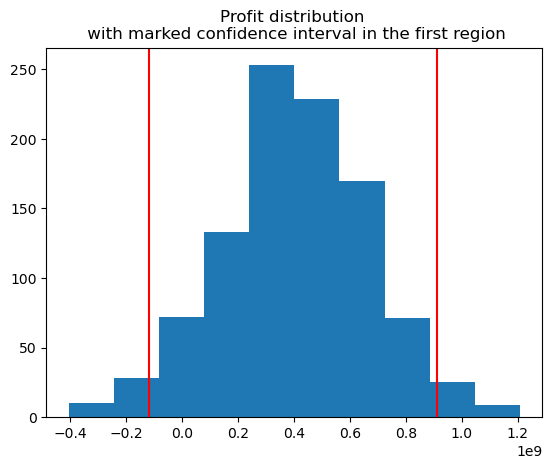

In [44]:
print("First region")
print("Average profit :", '{:,}'.format(mean(distribution_of_profits_one)), "rub.")
print("95% Confidence Interval:", '{:,}'.format(round(distribution_of_profits_one.quantile(0.025), 2)),
      "rub.", '-', '{:,}'.format(round(distribution_of_profits_one.quantile(0.975), 2)), "rub.")
print("Loss risk:", st.percentileofscore(distribution_of_profits_one, 0), '%')
plt.hist(distribution_of_profits_one)
plt.title('Profit distribution \n with marked confidence interval in the first region')
plt.axvline(x=distribution_of_profits_one.quantile(0.025), color='r')
plt.axvline(x=distribution_of_profits_one.quantile(0.975), color='r');

Second region
Average profit : 432,624,131.81 руб.
95% Confidence Interval: 16,846,174.93 руб. - 815,972,526.29 руб.
Loss risk: 2.0 %


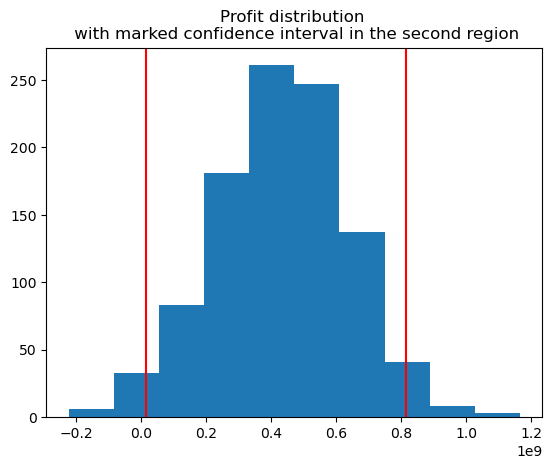

In [45]:
print("Second region")
print("Average profit :", '{:,}'.format(mean(distribution_of_profits_two)), "руб.")
print("95% Confidence Interval:", '{:,}'.format(round(distribution_of_profits_two.quantile(0.025), 2)),
      "руб.", '-', '{:,}'.format(round(distribution_of_profits_two.quantile(0.975), 2)), "руб.")
print("Loss risk:", round(st.percentileofscore(distribution_of_profits_two, 2), 0), '%')
plt.hist(distribution_of_profits_two)
plt.title('Profit distribution \n with marked confidence interval in the second region')
plt.axvline(x=distribution_of_profits_two.quantile(0.025), color='r')
plt.axvline(x=distribution_of_profits_two.quantile(0.975), color='r');

Third region
Average profit : 377,362,192.42 rub.
95% Confidence Interval: -170,780,417.71 rub. - 901,772,131.39 rub.
Loss risk: 7.4 %


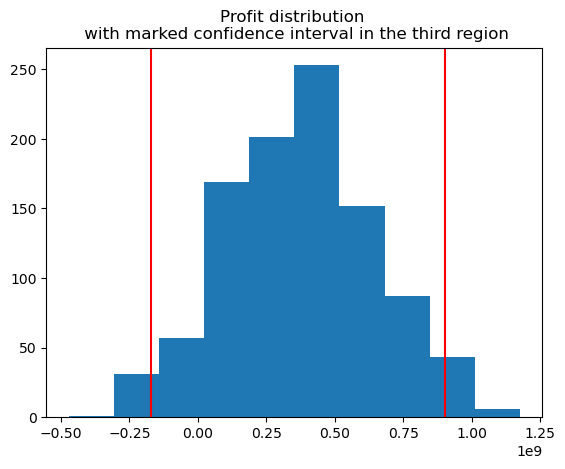

In [46]:
print("Third region")
print("Average profit :",'{:,}'.format(mean(distribution_of_profits_three)), "rub.")
print("95% Confidence Interval:", '{:,}'.format(round(distribution_of_profits_three.quantile(0.025), 2)),
      "rub.", '-', '{:,}'.format(round(distribution_of_profits_three.quantile(0.975), 2)), "rub.")
print("Loss risk:", st.percentileofscore(distribution_of_profits_three, 0), '%')
plt.hist(distribution_of_profits_three)
plt.title('Profit distribution \n with marked confidence interval in the third region')
plt.axvline(x=distribution_of_profits_three.quantile(0.025), color='r')
plt.axvline(x=distribution_of_profits_three.quantile(0.975), color='r');

<div class="alert alert-info">
<font size="4", color = "black"><a name="Conclusion"><h3>Conclusion</h3></a></font>
    <br /> 
    <font size="3", color = "black">

<div>
     <font size="3", color="black">
<br>Research has been carried out to find<b>a location for a well</b>.
        
        
<br><b> Input data - oil samples in three regions. </b>

        
<br> There are no gaps or duplicates in the data. The id column has been removed because it is not required for research. The data of the three regions were divided into training and validation sets, then into features and a target feature. Features are reduced to a single scale for the data of each region.
        
<br>A linear regression model was trained. A prediction function based on the trained model is written, then it is cast to Series and indexes are set.

        
<br> The volume of raw materials for the break-even development of a new well is 111, but the volume of reserves of an average well in the regions is much less than this value: 92.5, 68.83, 95. The average reserve of the region of the second region (68.8) is much less than that of other regions and the calculated reserve for break-even field development (111).
        
<br>A function is shown in which 1000 samples are generated to find the profit distribution. The average return, 95% confidence interval, risk of loss, and profit distribution for the three regions are shown as predicted by the linear regression model. The best forecast is given by the second region, because the risk of loss is only 2%. The worst forecasts were shown by the first and third regions - 6.7 and 7.4%.
 
<br><b>Based on this, the conclusion is made:
<br> - the second region is proposed for choosing the location of the well, because the risk of loss is small. </b>